# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
# 1. Shape of df_data
shape = df_data.shape
print(f"Shape of df_data: {shape} (Rows: {shape[0]}, Columns: {shape[1]})")

# 2. Column names and data types
column_info = df_data.dtypes
print("Column names and data types:\n", column_info)

# 3. First year Nobel Prize was awarded
first_year = df_data['year'].min()
print(f"The Nobel Prize was first awarded in: {first_year}")

# 4. Latest year included in the dataset
latest_year = df_data['year'].max()
print(f"The latest year included in the dataset is: {latest_year}")


Shape of df_data: (962, 16) (Rows: 962, Columns: 16)
Column names and data types:
 year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object
The Nobel Prize was first awarded in: 1901
The latest year included in the dataset is: 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
# 1. Check for duplicate values
duplicates = df_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Check for NaN values
nan_values = df_data.isnull().sum()
print("NaN values per column:\n", nan_values)



Number of duplicate rows: 0
NaN values per column:
 year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


### Check for NaN Values

In [11]:
# 3. Columns that tend to have NaN values
nan_columns = nan_values[nan_values > 0]
print("Columns with NaN values:\n", nan_columns)

# 4. Number of NaN values per column
print("Number of NaN values per column:\n", nan_values)

Columns with NaN values:
 motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64
Number of NaN values per column:
 year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
# 1. Convert birth_date to Datetime
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

# 2. Convert prize_share from string format to float
def convert_share(share):
    if isinstance(share, str) and '/' in share:
        numerator, denominator = map(int, share.split('/'))
        return numerator / denominator
    return float(share) if isinstance(share, (int, float)) else 0.0

# Apply the conversion
df_data['share_float'] = df_data['prize_share'].apply(convert_share)

# 3. Calculate share_pct
total_share = df_data['share_float'].sum()
df_data['share_pct'] = df_data['share_float'] / total_share * 100


#### Add a Column with the Prize Share as a Percentage

In [16]:
# Identify individuals who received a Nobel Prize more than once
multiple_winners = df_data['full_name'].value_counts()
multiple_winners = multiple_winners[multiple_winners > 1].reset_index()
multiple_winners.columns = ['Name', 'Count']
print("Individuals who won the Nobel Prize more than once:\n", multiple_winners)


Individuals who won the Nobel Prize more than once:
                                                 Name  Count
0  Comité international de la Croix Rouge (Intern...      3
1                                   Frederick Sanger      2
2                                 Linus Carl Pauling      2
3                                       John Bardeen      2
4  Office of the United Nations High Commissioner...      2
5                        Marie Curie, née Sklodowska      2


In [17]:
# Count the number of prizes awarded by category
category_counts = df_data['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Prizes']

# Create a Plotly bar chart
import plotly.express as px

fig = px.bar(category_counts,
             x='Category',
             y='Number of Prizes',
             color='Number of Prizes',
             color_continuous_scale='Aggrnyl',
             title='Number of Prizes Awarded by Category')

# Update layout to remove color axis
fig.update_coloraxes(showscale=False)
fig.show()

# Category with the most and fewest prizes awarded
most_prizes = category_counts.loc[category_counts['Number of Prizes'].idxmax()]
fewest_prizes = category_counts.loc[category_counts['Number of Prizes'].idxmin()]

print(f"Category with the most prizes: {most_prizes['Category']} ({most_prizes['Number of Prizes']})")
print(f"Category with the fewest prizes: {fewest_prizes['Category']} ({fewest_prizes['Number of Prizes']})")


Category with the most prizes: Medicine (222)
Category with the fewest prizes: Economics (86)


In [18]:
# First prize in Economics
economics_prize = df_data[df_data['category'] == 'Economics'].sort_values('year').iloc[0]
first_economics_year = economics_prize['year']
first_economics_winner = economics_prize['full_name']

print(f"The first prize in Economics was awarded in {first_economics_year} to {first_economics_winner}.")


The first prize in Economics was awarded in 1969 to Jan Tinbergen.


In [19]:
# Count the number of prizes by gender and category
gender_counts = df_data.groupby(['category', 'sex']).size().unstack(fill_value=0)

# Create a Plotly bar chart
gender_fig = px.bar(gender_counts,
                    x=gender_counts.index,
                    y=gender_counts.columns,
                    title='Nobel Prizes by Gender and Category')

gender_fig.show()

# Prizes awarded to women in Literature vs Physics
literature_women = gender_counts.loc['Literature', 'Female']
physics_women = gender_counts.loc['Physics', 'Female']

print(f"Prizes awarded to women in Literature: {literature_women}")
print(f"Prizes awarded to women in Physics: {physics_women}")


Prizes awarded to women in Literature: 16
Prizes awarded to women in Physics: 4


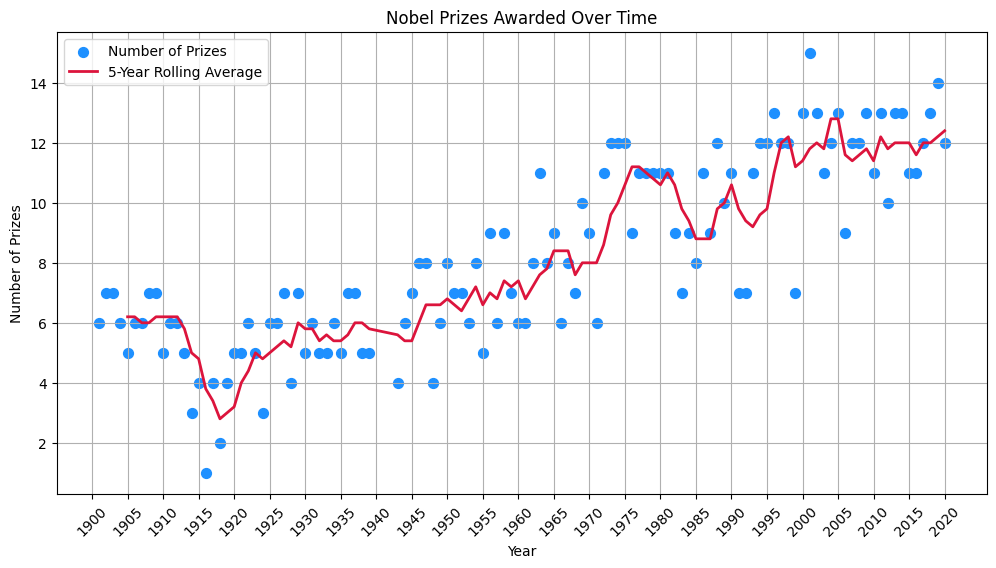

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Count the number of prizes awarded every year
prizes_per_year = df_data['year'].value_counts().sort_index()

# Create a 5-year rolling average
rolling_average = prizes_per_year.rolling(window=5).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(prizes_per_year.index, prizes_per_year, color='dodgerblue', label='Number of Prizes', s=50)
plt.plot(rolling_average.index, rolling_average, color='crimson', label='5-Year Rolling Average', linewidth=2)

# Customize the x-axis
plt.xticks(np.arange(1900, 2021, 5), rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.title('Nobel Prizes Awarded Over Time')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Analysis of the impact of world wars and trends
# The analysis could be added as text output in your notebook.


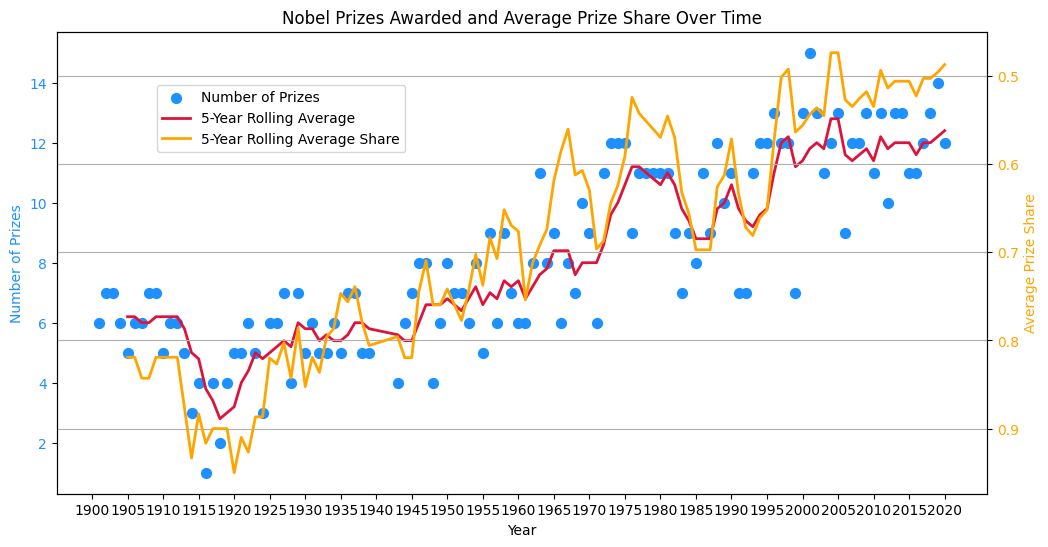

In [21]:
# Calculate the average prize share of winners on a year-by-year basis
df_data['share_float'] = df_data['prize_share'].apply(lambda x: eval(x) if isinstance(x, str) and '/' in x else float(x))
average_share_per_year = df_data.groupby('year')['share_float'].mean()

# Calculate the 5-year rolling average of the percentage share
rolling_average_share = average_share_per_year.rolling(window=5).mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary y-axis for the number of prizes
ax1.scatter(prizes_per_year.index, prizes_per_year, color='dodgerblue', label='Number of Prizes', s=50)
ax1.plot(rolling_average.index, rolling_average, color='crimson', label='5-Year Rolling Average', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Prizes', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.set_xticks(np.arange(1900, 2021, 5))

# Secondary y-axis for average prize share
ax2 = ax1.twinx()
ax2.plot(rolling_average_share.index, rolling_average_share, color='orange', label='5-Year Rolling Average Share', linewidth=2)
ax2.set_ylabel('Average Prize Share', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Invert secondary y-axis
ax2.invert_yaxis()

# Combine legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

plt.title('Nobel Prizes Awarded and Average Prize Share Over Time')
plt.grid()
plt.show()

# Analysis of the trend in prize sharing
# The analysis could be added as text output in your notebook.


In [22]:
# Create the DataFrame for total prizes won by country
top20_countries = df_data['birth_country'].value_counts().head(20).reset_index()
top20_countries.columns = ['Country', 'Total Prizes']

# Display the top 20 countries
print(top20_countries)

# Analyze which column to use
# It's generally best to use 'birth_country_current' because it reflects the current status of countries.
# Potential problems:
# - 'birth_country': Historical changes in country names may lead to inaccuracies.
# - 'organization_country': May miss individual laureates who are not affiliated with an organization.
# - 'birth_country_current': Less problematic, as it accounts for current national boundaries.

# Create a horizontal bar chart using Plotly
import plotly.express as px

fig = px.bar(top20_countries,
             x='Total Prizes',
             y='Country',
             orientation='h',
             title='Top 20 Countries by Nobel Prizes Won',
             color='Total Prizes',
             color_continuous_scale='Viridis')

fig.show()


                     Country  Total Prizes
0   United States of America           281
1             United Kingdom            91
2                    Germany            65
3                     France            54
4                     Sweden            29
5                      Japan            27
6                     Canada            20
7                Switzerland            19
8                Netherlands            18
9                      Italy            17
10                    Russia            17
11                   Austria            15
12                    Norway            12
13                     China            11
14                   Denmark            11
15                 Australia            10
16              South Africa             9
17                  Scotland             9
18                   Belgium             9
19          Germany (Poland)             8


In [23]:
# Prepare data for the choropleth map
country_codes = top20_countries['Country'].map(lambda x: df_data[df_data['birth_country'] == x]['ISO'].values[0] if not df_data[df_data['birth_country'] == x]['ISO'].empty else None)
top20_countries['ISO'] = country_codes

# Create the choropleth map
fig = px.choropleth(top20_countries,
                    locations='ISO',
                    locationmode='ISO-3',
                    color='Total Prizes',
                    title='Choropleth Map of Nobel Prizes by Country',
                    color_continuous_scale='Blues')

fig.show()


In [24]:
# Group by country and category
country_category_counts = df_data.groupby(['birth_country', 'category']).size().unstack(fill_value=0)

# Create a bar chart using Plotly
country_category_counts = country_category_counts.loc[top20_countries['Country']]

fig = px.bar(country_category_counts,
              x=country_category_counts.index,
              y=country_category_counts.columns,
              title='Nobel Prizes by Country and Category',
              barmode='stack')

fig.show()

# Analyze specific questions:
# - Germany and Japan vs. the US
# - Germany vs. UK
# - France vs. Germany
# - Australia's strongest category
# - Netherlands' half prizes category
# - US vs. France in Economics, Physics, Medicine


In [25]:
# Calculate cumulative prizes won by each country per year
cumulative_prizes = df_data.groupby(['year', 'birth_country_current']).size().unstack(fill_value=0).cumsum()

# Create a line chart using Plotly
fig = px.line(cumulative_prizes,
              title='Cumulative Nobel Prizes by Country Over Time')

fig.show()

# Analyze when the US eclipsed other countries
# Compare cumulative counts to see when the US surpasses others.


In [26]:
# Count the number of Nobel laureates affiliated with each organization
organization_counts = df_data['organization_name'].value_counts().head(20).reset_index()
organization_counts.columns = ['Organization', 'Total Laureates']

# Create a bar chart using Plotly
import plotly.express as px

fig = px.bar(organization_counts,
             x='Total Laureates',
             y='Organization',
             orientation='h',
             title='Top 20 Research Organizations by Nobel Laureates',
             color='Total Laureates',
             color_continuous_scale='Viridis')

fig.show()

# Analysis of specific organizations
uchicago_count = organization_counts[organization_counts['Organization'] == 'University of Chicago']['Total Laureates'].values[0]
harvard_count = organization_counts[organization_counts['Organization'] == 'Harvard University']['Total Laureates'].values[0]

print(f"Nobel Prize winners affiliated with University of Chicago: {uchicago_count}")
print(f"Nobel Prize winners affiliated with Harvard University: {harvard_count}")


Nobel Prize winners affiliated with University of Chicago: 20
Nobel Prize winners affiliated with Harvard University: 29


In [27]:
# Count the number of Nobel laureates by organization city
city_counts = df_data['organization_city'].value_counts().head(20).reset_index()
city_counts.columns = ['City', 'Total Laureates']

# Create a bar chart using Plotly
fig = px.bar(city_counts,
             x='Total Laureates',
             y='City',
             orientation='h',
             title='Top 20 Organization Cities by Nobel Laureates',
             color='Total Laureates',
             color_continuous_scale='Blues')

fig.show()

# Analysis of hotspots
top_city = city_counts.iloc[0]
european_cities = city_counts[city_counts['City'].str.contains('London|Paris|Berlin|Madrid|Rome')]
top_european_city = european_cities.iloc[0]

print(f"Top hotspot for discoveries: {top_city['City']} with {top_city['Total Laureates']} laureates.")
print(f"European city with the most discoveries: {top_european_city['City']} with {top_european_city['Total Laureates']} laureates.")


Top hotspot for discoveries: Cambridge, MA with 50 laureates.
European city with the most discoveries: London with 27 laureates.


In [29]:
# Count the number of Nobel laureates by birth city
birth_city_counts = df_data['birth_city'].value_counts().head(20).reset_index()
birth_city_counts.columns = ['Birth City', 'Total Laureates']

# Create a bar chart using Plotly with Plasma color scale
fig = px.bar(birth_city_counts,
             x='Total Laureates',
             y='Birth City',
             orientation='h',
             title='Top 20 Birth Cities of Nobel Laureates',
             color='Total Laureates',
             color_continuous_scale='Plasma')

fig.show()

# Function to safely retrieve the count for a city
def get_city_count(city_name):
    city_row = birth_city_counts[birth_city_counts['Birth City'] == city_name]
    if not city_row.empty:
        return city_row['Total Laureates'].values[0]
    return 0

# Analysis of specific cities
ny_count = get_city_count('New York')
london_count = get_city_count('London')
paris_count = get_city_count('Paris')
vienna_count = get_city_count('Vienna')

# Calculate the percentage of US prizes from New York
total_nobel_laureates = birth_city_counts['Total Laureates'].sum()
percentage_ny = (ny_count / total_nobel_laureates * 100) if total_nobel_laureates > 0 else 0

# Find top 5 cities in the US
top_five_us_cities = ['New York', 'Chicago', 'Los Angeles', 'Philadelphia', 'San Francisco']
top_five_cities_count = sum(get_city_count(city) for city in top_five_us_cities)

# Output the results
print(f"Percentage of US prizes from New York: {percentage_ny:.2f}%")
print(f"Nobel laureates born in London: {london_count}")
print(f"Nobel laureates born in Paris: {paris_count}")
print(f"Nobel laureates born in Vienna: {vienna_count}")
print(f"Number of top 5 cities in the US: {top_five_cities_count}")


Percentage of US prizes from New York: 0.00%
Nobel laureates born in London: 19
Nobel laureates born in Paris: 26
Nobel laureates born in Vienna: 14
Number of top 5 cities in the US: 0


In [31]:
# Create a DataFrame that groups the number of prizes by organization and country
organization_country_counts = df_data.groupby(['organization_name', 'birth_country_current']).size().reset_index(name='Total Prizes')

# Create the sunburst chart, using the country as part of the path
fig = px.sunburst(organization_country_counts,
                  path=['birth_country_current', 'organization_name'],
                  values='Total Prizes',
                  title='Nobel Prizes by Organization and Country',
                  color='birth_country_current')

fig.show()


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.
